## Lesson-03-Finally Part

## 今天的内容密度是三天最大的！！！
## 今天的难度也是相对来说比较大的！！！

## 今天课程完整听完的同学，我会给大家一个这三天完整代码 + 我们开源框架包源代码的领取方式，仅限于今天听完课程的同学~

## 今天我会听完课的！

## Step1: 输入“学AI”
## Step2: 收到一个短信，输入验证码
## Step3: 支付66抢占优惠券，正价课可以低价2000元
## Step4：报名正价课程成功，则领取所有优惠福利
## Step5：如果不报名正价课程，则原路退回全部金额~

## Lesson-03 Finally Part

最后一节课！

## Part-01 实现拓扑排序

In [1]:
simple_graph = {
    'a': [1, 2],
    'b': [2, 3]
}

In [10]:
from functools import reduce

In [14]:
list_a = [1, 2, 3]

list_b = [2, 3, 4]

In [18]:
set(list_b) - set(list_a)

{4}

In [12]:
reduce(lambda a, b: a + b, list(simple_graph.values()))

[1, 2, 2, 3]

In [22]:
import random

In [31]:
def topologic(graph):
    """graph: dict
    {
        x: [linear],
        k: [linear],
        b: [linear],
        linear: [sigmoid],
        sigmoid: [loss],
        y: [loss],       
    }
    """
    
    sorted_node = []
    
    while graph:
        all_nodes_have_inputs = reduce(lambda a, b: a + b, list(graph.values()))
        all_nodes_have_outputs = list(graph.keys())
    
        all_nodes_only_have_outputs_no_inputs = set(all_nodes_have_outputs) - set(all_nodes_have_inputs)
        
        if all_nodes_only_have_outputs_no_inputs:
            node = random.choice(list(all_nodes_only_have_outputs_no_inputs))
            
            sorted_node.append(node)
            if len(graph) == 1: sorted_node += graph[node]
                
            graph.pop(node)
        
            for _, links in graph.items():
                if node in links: links.remove(node)
        else:
            raise TypeError('this graph has circle, which cannot get topological order')
    return sorted_node
        

In [36]:
x, k, b, linear, sigmoid, y, loss = 'x', 'k', 'b', 'linear', 'sigmoid', 'y', 'loss'

test_graph =   {
        x: [linear],
        k: [linear],
        b: [linear],
        linear: [sigmoid],
        sigmoid: [loss],
        y: [loss],       
}

In [37]:
test_graph

{'x': ['linear'],
 'k': ['linear'],
 'b': ['linear'],
 'linear': ['sigmoid'],
 'sigmoid': ['loss'],
 'y': ['loss']}

In [38]:
topologic(test_graph)

['x', 'k', 'y', 'b', 'linear', 'sigmoid', 'loss']

## 一起来见证拓扑排序的威力吧！！！

In [114]:
import numpy as np

$\partial$

In [219]:
class Node:
    def __init__(self, inputs=[], name=None, is_trainable=False):
        self.inputs = inputs
        self.outputs = []
        self.name = name
        self.value = None
        self.gradients = dict() # 存储loss对某个值得偏导
        self.is_trainable = is_trainable
        
        for node in inputs:
            node.outputs.append(self)
            
    def forward(self):
        #print('I am {}, I have no humam baba, I calculate myself value by MYSEL !!!'.format(self.name))
        pass
    
    def backward(self):
        pass
            
    def __repr__(self):
        return 'Node: {}'.format(self.name)
    
class Placeholder(Node):
    def __init__(self, name=None, is_trainable=False):
        Node.__init__(self, name=name, is_trainable=is_trainable)
            
#     def forward(self):
#         print('I am {}, I was assigned value:{} by human baba'.format(self.name, self.value))
        
    def backward(self):
        self.gradients[self] = self.outputs[0].gradients[self]
            
    def __repr__(self):
        return 'Placeholer: {}'.format(self.name)
    
    
class Linear(Node):
    def __init__(self, x, k, b, name=None):
        Node.__init__(self, inputs=[x, k, b], name=name)
                
    def forward(self):
        x, k, b = self.inputs[0], self.inputs[1], self.inputs[2]
        self.value = k.value * x.value + b.value
       # print('I am {}, I have no humam baba, I calculate myself value : {} by MYSEL !!!'.format(self.name, self.value))
    
    def backward(self):
        x, k, b = self.inputs[0], self.inputs[1], self.inputs[2]
        self.gradients[self.inputs[0]] = self.outputs[0].gradients[self] * k.value
                                            
        self.gradients[self.inputs[1]] = self.outputs[0].gradients[self] * x.value
        
        self.gradients[self.inputs[2]] = self.outputs[0].gradients[self] * 1
                                                 

#         print('self.gradients[self.inputs[0]]| {}'.format(self.gradients[self.inputs[0]]))
#         print('self.gradients[self.inputs[1]]| {}'.format(self.gradients[self.inputs[1]]))
#         print('self.gradients[self.inputs[2]]| {}'.format(self.gradients[self.inputs[2]]))
        
    def __repr__(self):
        return 'Linear: {}'.format(self.name)
      
class Sigmoid(Node):
    def __init__(self, x, name=None):
        Node.__init__(self, inputs=[x], name=name)
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self):
        x = self.inputs[0]
        self.value = self._sigmoid(x.value)
        
       # print('I am {}, I have no humam baba, I calculate myself value : {} by MYSEL !!!'.format(self.name, self.value))

    def backward(self):
        x = self.inputs[0]
        self.gradients[self.inputs[0]] = self.outputs[0].gradients[self] * (self._sigmoid(x.value) * (1 - self._sigmoid(x.value)))

       # print('self.gradients[self.inputs[0]]| {}'.format(self.gradients[self.inputs[0]]))

            
    def __repr__(self):
        return 'Linear: {}'.format(self.name)
    
class Loss(Node):
    def __init__(self, y, yhat, name=None):
        Node.__init__(self, inputs=[y, yhat], name=name)
    
    def forward(self):
        y = self.inputs[0]
        yhat = self.inputs[1]
        self.value = np.mean((y.value - yhat.value)**2)
        
    #    print('I am {}, I have no humam baba, I calculate myself value : {} by MYSEL !!!'.format(self.name, self.value))
    
    def backward(self):
        y = self.inputs[0]
        yhat = self.inputs[1]
#         self.gradients[self.inputs[0]] = '∂{} / ∂{}'.format(self.name, self.inputs[0].name)
#         self.gradients[self.inputs[1]] = '∂{} / ∂{}'.format(self.name, self.inputs[1].name)
        
        self.gradients[self.inputs[0]] = 2 * np.mean(y.value - yhat.value)
        self.gradients[self.inputs[1]] = -2 * np.mean(y.value - yhat.value)
        
#         print('self.gradients[self.inputs[0]].{}| {}'.format(self.inputs[0].name, 
#                                                              self.gradients[self.inputs[0]]))
#         print('self.gradients[self.inputs[1]].{}| {}'.format(self.inputs[1].name, 
#                                                              self.gradients[self.inputs[1]]))
        
    def __repr__(self):
        return 'Loss: {}'.format(self.name)
## Our Simple Model Elements
# version-01
# node_x = Node(inputs=None)
# node_y = Node(inputs=None, outputs=[node_loss])
# node_k = Node(inputs=None, outputs=[node_linear])
# node_b = Node(inputs=None, outputs=[node_linear])
# node_linear = Node(inputs=[node_x, node_k, node_b], 
#                    outputs=[node_sigmoid])
# node_sigmoid = Node(inputs=[node_linear], outputs=[node_loss])
# node_loss = Node(inputs=[node_sigmoid, node_y], outputs=None)

#version-02
node_x = Placeholder(name='x')
node_y = Placeholder(name='y')

node_k = Placeholder(name='k', is_trainable=True)
node_b = Placeholder(name='b', is_trainable=True)

node_linear = Linear(node_x, node_k, node_b, name='linear')
node_sigmoid = Sigmoid(x=node_linear, name='sigmoid')
node_loss = Loss(yhat=node_sigmoid, y=node_y, name='loss')

In [220]:
feed_dict = {
    node_x: 3,
    node_y: random.random(),
    node_k: random.random(),
    node_b: 0.38
}

In [221]:
from collections import defaultdict

In [222]:
def convert_feed_dict_to_graph(feed_dict):
    need_expand = [n for n in feed_dict]

    computing_graph = defaultdict(list)

    while need_expand:
        n = need_expand.pop(0)

        if n in computing_graph: continue
            
        if isinstance(n, Placeholder): n.value = feed_dict[n]

        for m in n.outputs:
            computing_graph[n].append(m)
            need_expand.append(m)
            
    return computing_graph

In [223]:
sorted_nodes = topologic(convert_feed_dict_to_graph(feed_dict))

In [224]:
sorted_nodes

[Placeholer: b,
 Placeholer: k,
 Placeholer: y,
 Placeholer: x,
 Linear: linear,
 Linear: sigmoid,
 Loss: loss]

## 模拟神经网络的计算过程!

In [243]:
## Feedforward 

def forward(graph_sorted_nodes):
    for node in graph_sorted_nodes:
        node.forward()
        if isinstance(node, Loss):
            print('loss value: {}'.format(node.value))

# Backward Propogation

def backward(graph_sorted_nodes):
    for node in graph_sorted_nodes[::-1]:
        #print('\nI am: {}'.format(node.name))
        node.backward()

def run_one_epoch(graph_sorted_nodes):
    forward(graph_sorted_nodes)
    backward(graph_sorted_nodes)

#optimize
def optimize(graph_nodes, learning_rate=1e-3):
    for node in graph_nodes:
        if node.is_trainable:
            node.value = node.value + -1 * node.gradients[node] * learning_rate
            cmp = 'large' if node.gradients[node] > 0 else 'small'
            #print("{}'value is too {}, I need update myself to {}".format(node.name, cmp, node.value))

## 完整的一次求值-求导-更新应该是:

In [244]:
loss_history = []

for _ in range(100):
    run_one_epoch(sorted_nodes)
    __loss_node = sorted_nodes[-1]
    assert isinstance(__loss_node, Loss)
    
    loss_history.append(__loss_node.value)
    
    optimize(sorted_nodes, learning_rate=1e-1)

loss value: 0.05745260803432485
loss value: 0.05639207736675457
loss value: 0.055292105049436026
loss value: 0.05415164652123604
loss value: 0.0529697621835119
loss value: 0.051745647425610136
loss value: 0.05047866689350499
loss value: 0.04916839317438457
loss value: 0.047814649942213315
loss value: 0.0464175594300558
loss value: 0.04497759385511654
loss value: 0.043495630114236135
loss value: 0.041973006686100704
loss value: 0.04041158122196499
loss value: 0.038813786787424746
loss value: 0.03718268415292372
loss value: 0.03552200695367832
loss value: 0.03383619600083181
loss value: 0.03213041859321705
loss value: 0.030410568438070898
loss value: 0.0286832418357734
loss value: 0.02695568621588027
loss value: 0.025235718012998568
loss value: 0.023531608290944573
loss value: 0.021851936455421682
loss value: 0.020205414756212133
loss value: 0.018600688898465455
loss value: 0.017046122702199854
loss value: 0.015549577048706669
loss value: 0.014118194989351475
loss value: 0.01275820555971

In [245]:
import matplotlib.pyplot as plt

In [248]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [250]:
sigmoid(sorted_nodes[1].value * sorted_nodes[3].value + sorted_nodes[0].value)

0.6876006353543884

In [253]:
sorted_nodes[2].value

0.687366459078083

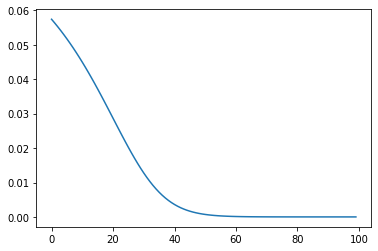

In [246]:
plt.plot(loss_history)

## 其实，我们不经意间，已经完成了深度学习框架的核心内容了！！！

## 如何处理多维数据？

In [254]:
import numpy as np
import random

class Node:
    def __init__(self, inputs=[]):
        self.inputs = inputs
        self.outputs = []

        for n in self.inputs:
            n.outputs.append(self)
            # set 'self' node as inbound_nodes's outbound_nodes

        self.value = None

        self.gradients = {}
        # keys are the inputs to this node, and their
        # values are the partials of this node with 
        # respect to that input.
        # \partial{node}{input_i}
        

    def forward(self):
        '''
        Forward propagation. 
        Compute the output value vased on 'inbound_nodes' and store the 
        result in self.value
        '''

        raise NotImplemented
    

    def backward(self):

        raise NotImplemented
        
class Placeholder(Node):
    def __init__(self):
        '''
        An Input node has no inbound nodes.
        So no need to pass anything to the Node instantiator.
        '''
        Node.__init__(self)

    def forward(self, value=None):
        '''
        Only input node is the node where the value may be passed
        as an argument to forward().
        All other node implementations should get the value of the 
        previous node from self.inbound_nodes
        
        Example: 
        val0: self.inbound_nodes[0].value
        '''
        if value is not None:
            self.value = value
            ## It's is input node, when need to forward, this node initiate self's value.

        # Input subclass just holds a value, such as a data feature or a model parameter(weight/bias)
        
    def backward(self):
        self.gradients = {self:0}
        for n in self.outputs:
            grad_cost = n.gradients[self]
            self.gradients[self] = grad_cost * 1
            
        
        # input N --> N1, N2
        # \partial L / \partial N 
        # ==> \partial L / \partial N1 * \ partial N1 / \partial N


class Add(Node):
    def __init__(self, *nodes):
        Node.__init__(self, nodes)


    def forward(self):
        self.value = sum(map(lambda n: n.value, self.inputs))
        ## when execute forward, this node caculate value as defined.

class Linear(Node):
    def __init__(self, nodes, weights, bias):
        Node.__init__(self, [nodes, weights, bias])

    def forward(self):
        inputs = self.inputs[0].value
        weights = self.inputs[1].value
        bias = self.inputs[2].value

        self.value = np.dot(inputs, weights) + bias
        
    def backward(self):

        # initial a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            # Get the partial of the cost w.r.t this node.
            grad_cost = n.gradients[self]

            self.gradients[self.inputs[0]] = np.dot(grad_cost, self.inputs[1].value.T)
            self.gradients[self.inputs[1]] = np.dot(self.inputs[0].value.T, grad_cost)
            self.gradients[self.inputs[2]] = np.sum(grad_cost, axis=0, keepdims=False)

        # WX + B / W ==> X
        # WX + B / X ==> W

class Sigmoid(Node):
    def __init__(self, node):
        Node.__init__(self, [node])


    def _sigmoid(self, x):
        return 1./(1 + np.exp(-1 * x))

    def forward(self):
        self.x = self.inputs[0].value
        self.value = self._sigmoid(self.x)

    def backward(self):
        self.partial = self._sigmoid(self.x) * (1 - self._sigmoid(self.x))
        
        # y = 1 / (1 + e^-x)
        # y' = 1 / (1 + e^-x) (1 - 1 / (1 + e^-x))
        
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            grad_cost = n.gradients[self]  # Get the partial of the cost with respect to this node.

            self.gradients[self.inputs[0]] = grad_cost * self.partial
            # use * to keep all the dimension same!.



class MSE(Node):
    def __init__(self, y, a):
        Node.__init__(self, [y, a])


    def forward(self):
        y = self.inputs[0].value.reshape(-1, 1)
        a = self.inputs[1].value.reshape(-1, 1)
        assert(y.shape == a.shape)

        self.m = self.inputs[0].value.shape[0]
        self.diff = y - a

        self.value = np.mean(self.diff**2)


    def backward(self):
        self.gradients[self.inputs[0]] = (2 / self.m) * self.diff
        self.gradients[self.inputs[1]] = (-2 / self.m) * self.diff


def forward_and_backward(graph):
    # execute all the forward method of sorted_nodes.

    ## In practice, it's common to feed in mutiple data example in each forward pass rather than just 1. Because the examples can be processed in parallel. The number of examples is called batch size.
    for n in graph:
        n.forward()
        ## each node execute forward, get self.value based on the topological sort result.

    for n in  graph[::-1]:
        n.backward()

###   v -->  a -->  C
##    b --> C
##    b --> v -- a --> C
##    v --> v ---> a -- > C

def toplogic(graph):
    sorted_node = []
    
    while len(graph) > 0: 

        all_inputs = []
        all_outputs = []
        
        for n in graph:
            all_inputs += graph[n]
            all_outputs.append(n)
        
        all_inputs = set(all_inputs)
        all_outputs = set(all_outputs)
    
        need_remove = all_outputs - all_inputs  # which in all_inputs but not in all_outputs
    
        if len(need_remove) > 0: 
            node = random.choice(list(need_remove))

            need_to_visited = [node]

            if len(graph) == 1: need_to_visited += graph[node]
                
            graph.pop(node)
            sorted_node += need_to_visited
        
            for _, links in graph.items():
                if node in links: links.remove(node)
        else: # have cycle
            break
        
    return sorted_node

from collections import defaultdict


def convert_feed_dict_to_graph(feed_dict):
    computing_graph = defaultdict(list)
    
    nodes = [n for n in feed_dict]
    
    while nodes:
        n = nodes.pop(0) 
        
        if isinstance(n, Placeholder):
            n.value = feed_dict[n]
        
        if n in computing_graph: continue

        for m in n.outputs:
            computing_graph[n].append(m)
            nodes.append(m)
    
    return computing_graph

def topological_sort_feed_dict(feed_dict):
    graph = convert_feed_dict_to_graph(feed_dict)
    
    return toplogic(graph)


def optimize(trainables, learning_rate=1e-2):
    # there are so many other update / optimization methods
    # such as Adam, Mom, 
    for t in trainables:
        t.value += -1 * learning_rate * t.gradients[t]

## Code Self-Description 

## Good Documents! ==> The best ducoment is the source code 

In [264]:
load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [265]:
import pandas as pd

In [286]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
#from miniflow import *

# Load data
data = load_boston()
dataframe = pd.DataFrame(data['data'])
dataframe.columns = data['feature_names']

X_ = dataframe[['RM', 'LSTAT']]
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Placeholder(), Placeholder()
W1, b1 = Placeholder(), Placeholder()
W2, b2 = Placeholder(), Placeholder()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 200
# Total number of examples
m = X_.shape[0]
batch_size = 1
steps_per_epoch = m // batch_size

graph = topological_sort_feed_dict(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

Total number of examples = 506


In [287]:
from tqdm import tqdm_notebook

In [288]:
losses = []


for i in tqdm_notebook(range(epochs)):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        _ = None
        forward_and_backward(graph) # set output node not important.

        # Step 3
        rate = 1e-2
    
        optimize(trainables, rate)

        loss += graph[-1].value
    
    if i % 100 == 0: 
        print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))
        losses.append(loss/steps_per_epoch)

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


Epoch: 1, Loss: 45.088
Epoch: 101, Loss: 20.564



## 效果是很好啦~ 但是，我们想知道到底拟合出来了什么函数。怎么办呢？？

## 把维度降低成三维空间

In [275]:
from mpl_toolkits.mplot3d import Axes3D

In [277]:
graph

In [278]:
X in graph

True

In [297]:
graph

In [295]:
predicate_results = []
for rm, ls in X_.values:
    X.value = np.array([[rm, ls]])
    forward_and_backward(graph)
    predicate_results.append(graph[-2].value[0][0])

In [298]:
predicate_results

[27.413465047466236,
 23.593755058767506,
 35.858739752464615,
 35.695861910899254,
 32.667062624139284,
 24.51088156851858,
 20.261891392697407,
 14.49996561881435,
 11.884257438704926,
 16.29215632216576,
 12.74425511093812,
 20.0611135731285,
 17.152584179315518,
 22.11628812104111,
 21.817304392034213,
 21.91132961162351,
 22.24173853308934,
 18.474604957471826,
 18.941613413002877,
 19.16896461597429,
 12.635410702754703,
 19.695613554147215,
 15.083800272158527,
 13.763750792785991,
 16.65122705337576,
 16.349413787655045,
 18.58854047036693,
 16.210460582585853,
 20.017325104888275,
 21.767512413084773,
 11.99988194907267,
 20.16421093043626,
 11.884430714795759,
 15.673586107290348,
 13.003133633943424,
 21.32096654373069,
 19.504208539418777,
 21.794139620229984,
 21.019554775232137,
 29.676161003838843,
 36.34026279167895,
 30.837059851966885,
 22.562216963523195,
 22.912116425575988,
 22.313032624499172,
 19.656833327834544,
 19.31420494242132,
 15.065402329465519,
 11.88422

In [308]:
%matplotlib inline

In [309]:
X_

array([ 4.13671889e-01,  1.94274453e-01,  1.28271368e+00,  1.01630251e+00,
        1.22857665e+00,  2.07096381e-01, -3.88410945e-01, -1.60465557e-01,
       -9.31205901e-01, -3.99808215e-01,  1.31589471e-01, -3.92684921e-01,
       -5.63643963e-01, -4.78164442e-01, -2.68739617e-01, -6.42000190e-01,
       -4.98109663e-01, -4.19753436e-01, -1.18052117e+00, -7.94438668e-01,
       -1.01811008e+00, -4.55369903e-01, -2.03205317e-01, -6.71918022e-01,
       -5.13780909e-01, -9.76794979e-01, -6.71918022e-01, -3.38547892e-01,
        2.99699195e-01,  5.54713098e-01, -8.14383890e-01, -3.02931425e-01,
       -4.76739783e-01, -8.31479794e-01, -2.68739617e-01, -5.00958981e-01,
       -6.32027579e-01, -6.19205651e-01, -4.53945244e-01,  4.42165063e-01,
        1.05334363e+00,  6.91480331e-01, -1.64739533e-01, -1.04903869e-01,
       -3.07205401e-01, -8.58548308e-01, -7.10383806e-01, -3.62767089e-01,
       -1.26172671e+00, -9.72521003e-01, -4.58219220e-01, -2.41671102e-01,
        3.22493734e-01, -

In [315]:
%matplotlib notebook

<IPython.core.display.Javascript object>


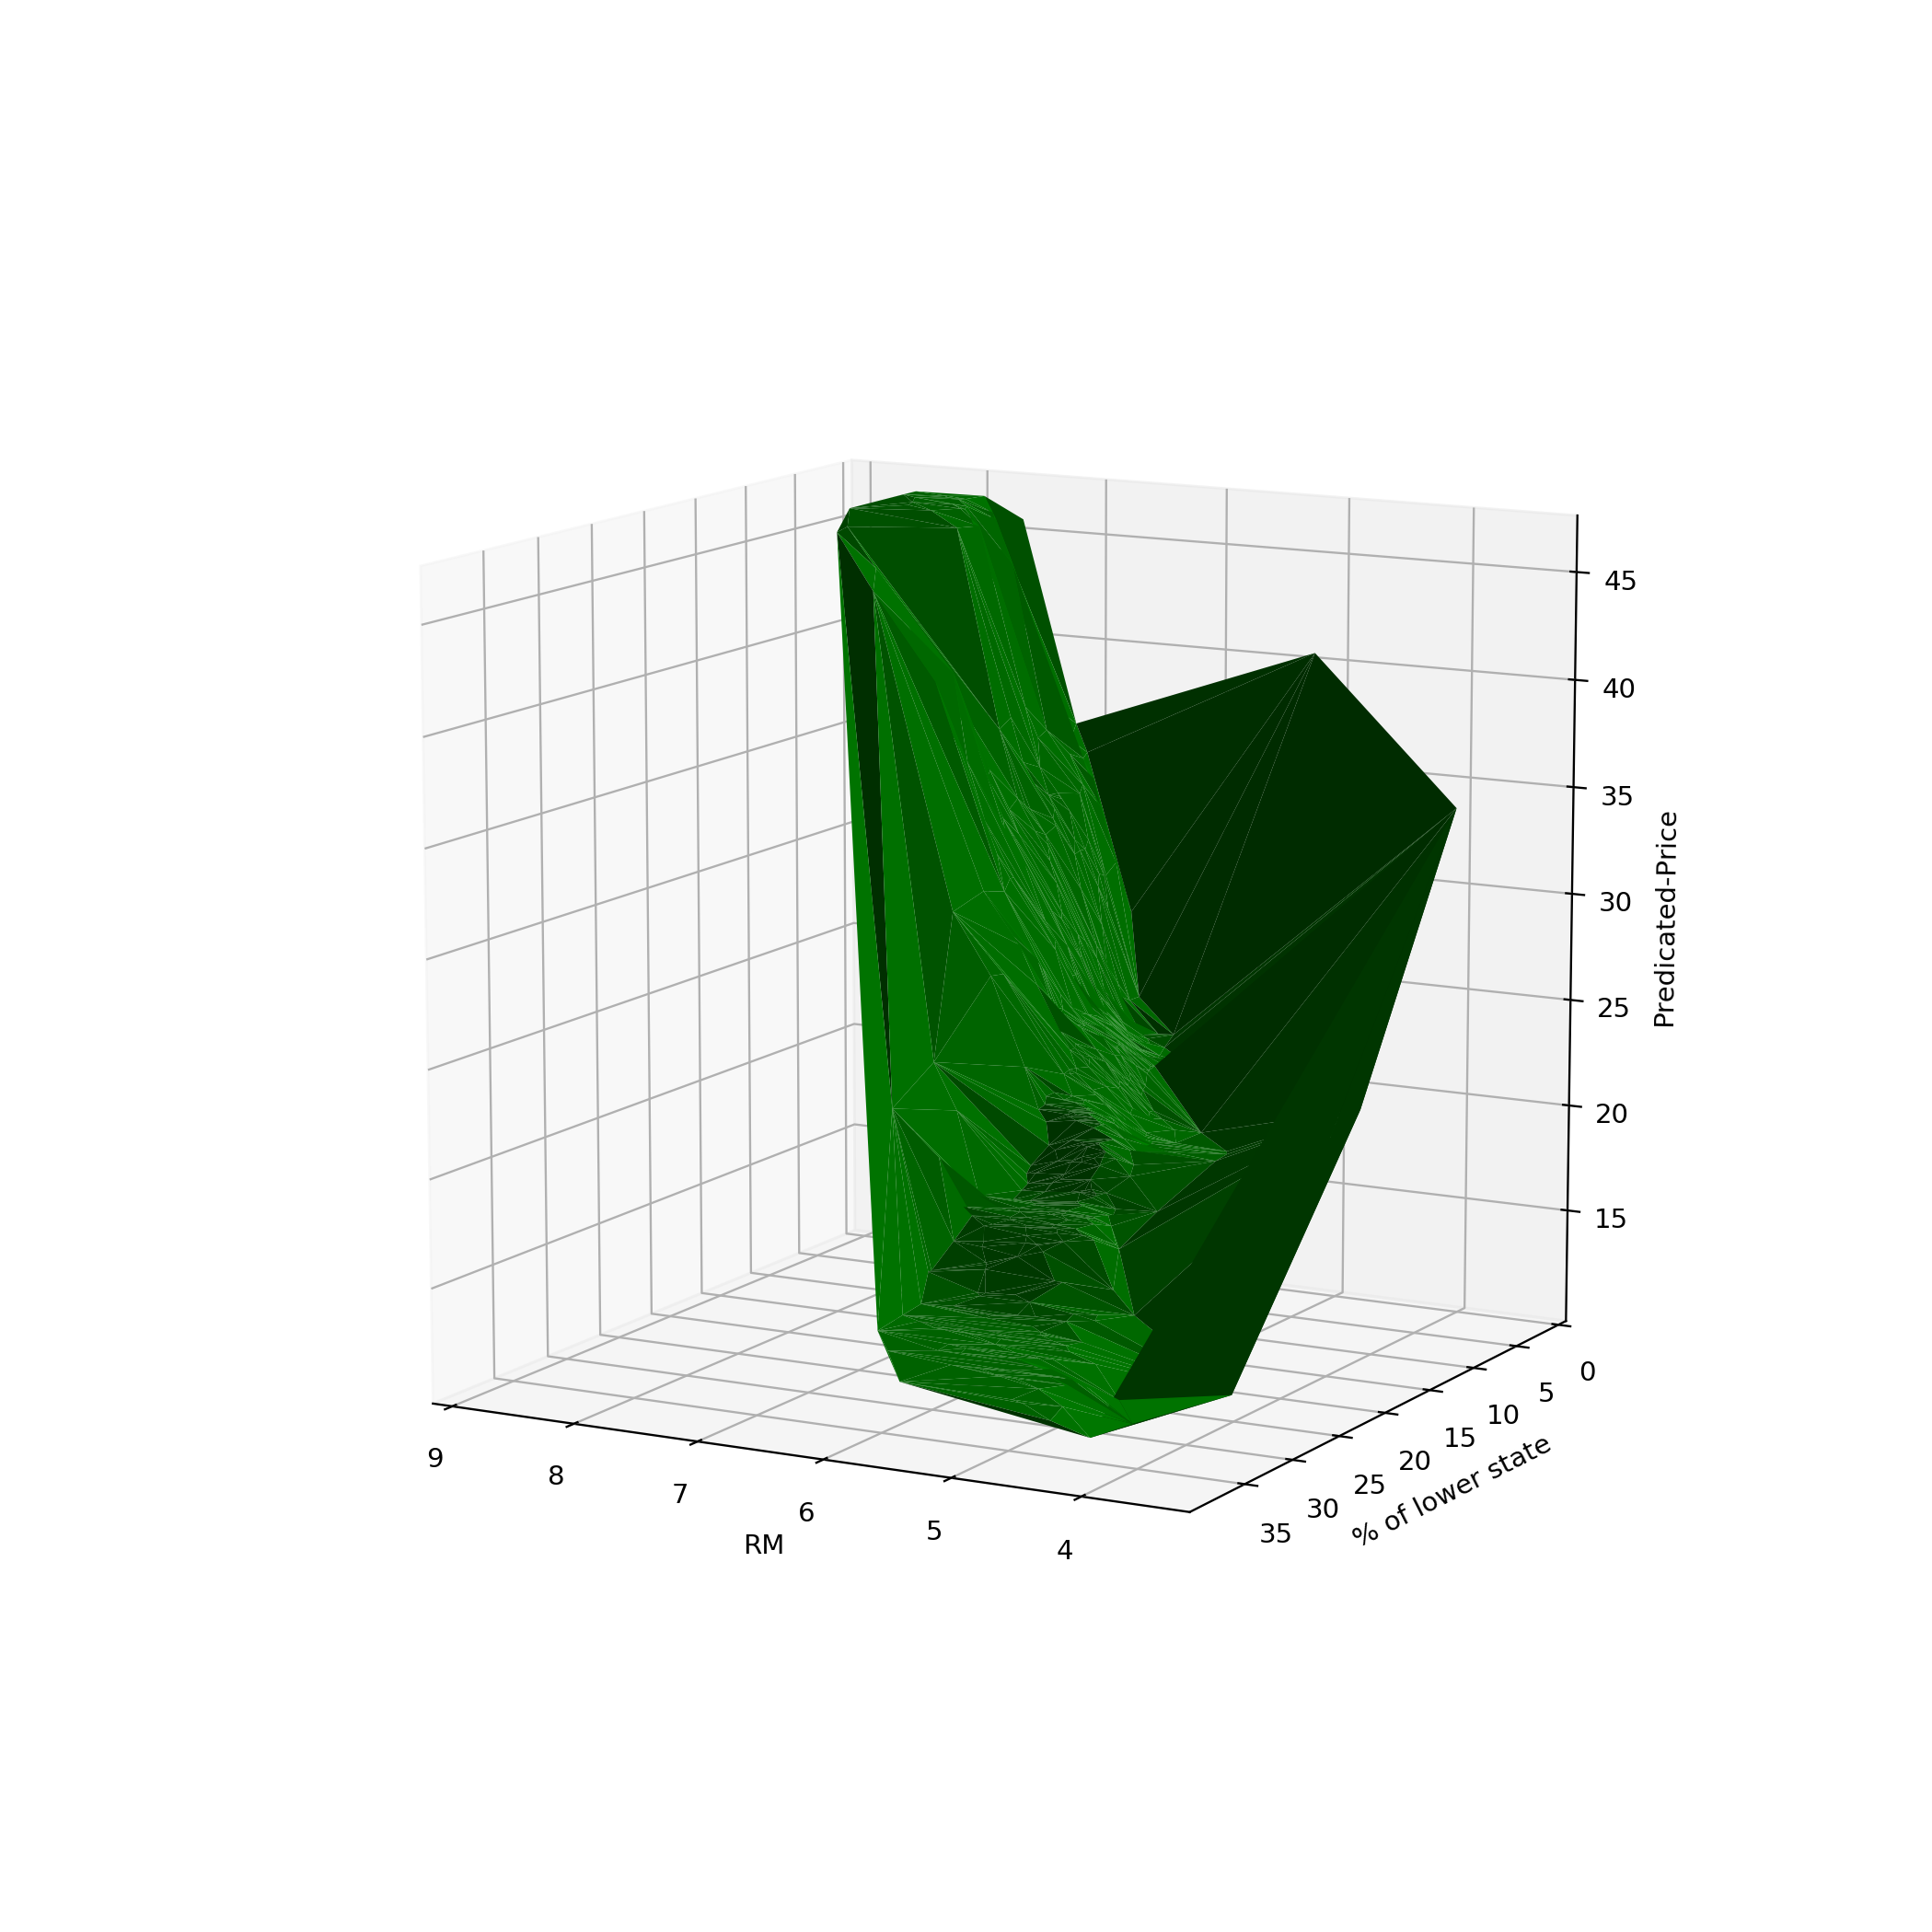

Text(0.5, 0, 'Predicated-Price')

In [316]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X_ = dataframe[['RM', 'LSTAT']].values[:, 0]
Y_ = dataframe[['RM', 'LSTAT']].values[:, 1]

Z = predicate_results

rm_and_lstp_price = ax.plot_trisurf(X_, Y_, Z, color='green')

ax.set_xlabel('RM')
ax.set_ylabel('% of lower state')
ax.set_zlabel('Predicated-Price')

## How to distribute code to internet!

## send-email, 稍微介绍一下自己，需要源代码~

## minchiuan.gao@gmail.com 